In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
%matplotlib inline

In [107]:
df=pd.read_csv('HR-Employee-Attrition.csv')

In [108]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


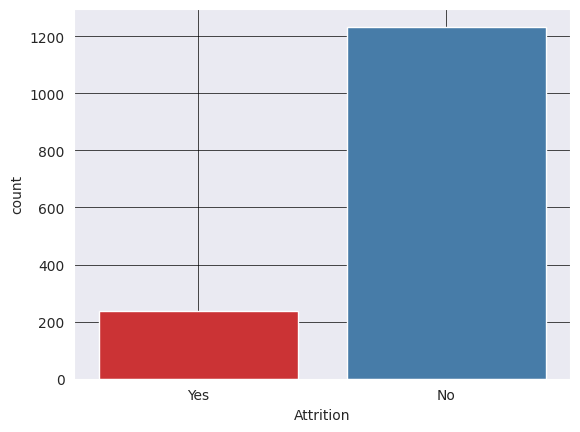

In [110]:
sns.set_style("darkgrid")
sns.countplot(x='Attrition',data=df,palette='Set1',hue='Attrition')
plt.grid(color='black', linewidth=0.5)

In [111]:
columns=['Department','EducationField','JobRole','BusinessTravel','MaritalStatus']
for col in columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)

df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})
df['Over18']=df['Over18'].map({'Y':1,'N':0})
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [112]:
df.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1,inplace=True)

In [113]:
X = df.drop('Attrition', axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Attrition
0    986
1    986
Name: count, dtype: int64

In [115]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_sm, y_train_sm)
y_pred=tree_clf.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report: ",classification_report(y_test,y_pred))


Accuracy : 0.7312925170068028

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.77      0.83       247
           1       0.30      0.51      0.38        47

    accuracy                           0.73       294
   macro avg       0.60      0.64      0.60       294
weighted avg       0.80      0.73      0.76       294



In [116]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1,  
    cv=5
)

tree_cv.fit(X_train_sm, y_train_sm)


print("Best Parameters:", tree_cv.best_params_)
print("Best Cross-Validation Score:", tree_cv.best_score_)
print("Test Accuracy:", tree_cv.score(X_test, y_test))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.8257919293717091
Test Accuracy: 0.35772357723577236


In [117]:
best_params = tree_cv.best_params_
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_sm, y_train)

ValueError: Number of labels=1176 does not match number of samples=1972

In [ ]:
features = X_train_sm.columns.tolist()
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'